In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [26]:
# Membaca data dari CSV
data_umkm = pd.read_csv('data_UMKM.csv')
data_penduduk = pd.read_csv('data-wilayah-dan-jumlah-penduduk.csv')

In [27]:
# Mengganti nama kolom
data_umkm.columns = ['Wilayah', 'Aksesoris', 'Batik', 'Bordir', 'Craft', 'Fashion', 'Konveksi', 'Kuliner', 'Makanan', 'Minuman', 'jasa_lain']
data_penduduk.columns = ['Wilayah', 'Jumlah Penduduk']

# Menggabungkan data
data_combined = pd.merge(data_umkm, data_penduduk, on='Wilayah')

In [28]:
# Preprocessing data
data_combined = data_combined.drop('Batik', axis=1)

In [29]:
data_combined.head()

,Wilayah,Aksesoris,Bordir,Craft,Fashion,Konveksi,Kuliner,Makanan,Minuman,jasa_lain,Jumlah Penduduk
0,KABUPATEN BOGOR,1110,159,39644,38693,23628,170630,124801,23152,53916,45588960
1,KABUPATEN CIANJUR,742,106,26512,25875,15801,114106,83459,15483,36056,23484120
2,KABUPATEN GARUT,767,110,27393,26735,16326,117897,86232,15997,37254,25559240
3,KABUPATEN TASIKMALAYA,557,80,19880,19403,11848,85562,62581,11610,27036,17940910
4,KABUPATEN CIAMIS,414,59,14769,14415,8802,63566,46493,8625,20086,12670490


In [30]:
# Skala fitur-fitur
scaler = StandardScaler()
X = data_combined.drop(['Wilayah'], axis=1)
X = scaler.fit_transform(X)

In [31]:
# Menggunakan jumlah cluster yang optimal
cluster = 3
kmeans = KMeans(n_clusters=cluster, random_state=0)
data_combined['Cluster'] = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
# Fungsi untuk merekomendasikan wilayah
def recommend_regions(jenis_usaha_input):
    # cluster_mean = data_combined.groupby('Cluster')[jenis_usaha_input].mean()
    # best_clusters = cluster_mean.nlargest(optimal_clusters).index

    # Menghitung hasil KMeans berdasarkan jenis usaha yang diinputkan dan jumlah penduduk
    X_reduced = data_combined[[jenis_usaha_input, 'Jumlah Penduduk']].values
    kmeans = KMeans(n_clusters=3, random_state=0)
    data_combined['Cluster'] = kmeans.fit_predict(X_reduced)

    rekom = []
    for cluster in [0, 2, 1]:
        cluster_data = data_combined[data_combined['Cluster'] == cluster]
        cluster_data_sorted = cluster_data.sort_values(by=jenis_usaha_input, ascending=False)
        rekom.extend(zip(cluster_data_sorted['Wilayah'], cluster_data_sorted[jenis_usaha_input], cluster_data_sorted['Jumlah Penduduk']))

    return rekom

In [58]:
jenis_usaha_input = input("Masukkan jenis usaha anda : ")
wilayah_rekomendasi = recommend_regions(jenis_usaha_input)


# Menampilkan hasil rekomendasi wilayah
print(f"Jenis Usaha: {jenis_usaha_input}")
print("=" * 32)
print(f"Berikut urutan wilayah yang direkomendasikan untuk jenis usaha {jenis_usaha_input}:\n")
for i, (wilayah, jumlah_umkm, jumlah_penduduk) in enumerate(wilayah_rekomendasi, start=1):
    formatted_jumlah_umkm = "{:,}".format(jumlah_umkm)
    formatted_jumlah_penduduk = "{:,.0f}".format(jumlah_penduduk)
    print(f"{i}. Nama Wilayah: {wilayah}")
    print(f"   Jumlah Penduduk: {formatted_jumlah_penduduk} Jiwa")
    print(f"   Jumlah Usaha Serupa: {formatted_jumlah_umkm}\n")

Masukkan jenis usaha anda : Minuman
Jenis Usaha: Minuman
Berikut urutan wilayah yang direkomendasikan untuk jenis usaha Minuman:

1. Nama Wilayah: KABUPATEN BOGOR
   Jumlah Penduduk: 45,588,960 Jiwa
   Jumlah Usaha Serupa: 23,152

2. Nama Wilayah: KABUPATEN GARUT
   Jumlah Penduduk: 25,559,240 Jiwa
   Jumlah Usaha Serupa: 15,997

3. Nama Wilayah: KABUPATEN CIANJUR
   Jumlah Penduduk: 23,484,120 Jiwa
   Jumlah Usaha Serupa: 15,483

4. Nama Wilayah: KABUPATEN KARAWANG 
   Jumlah Penduduk: 20,524,060 Jiwa
   Jumlah Usaha Serupa: 14,421

5. Nama Wilayah: KABUPATEN INDRAMAYU
   Jumlah Penduduk: 19,043,790 Jiwa
   Jumlah Usaha Serupa: 11,794

6. Nama Wilayah: KABUPATEN TASIKMALAYA
   Jumlah Penduduk: 17,940,910 Jiwa
   Jumlah Usaha Serupa: 11,610

7. Nama Wilayah: KABUPATEN BANDUNG BARAT
   Jumlah Penduduk: 16,644,670 Jiwa
   Jumlah Usaha Serupa: 9,648

8. Nama Wilayah: KABUPATEN CIAMIS
   Jumlah Penduduk: 12,670,490 Jiwa
   Jumlah Usaha Serupa: 8,625

9. Nama Wilayah: KABUPATEN PURWAKARTA 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
# Fungsi untuk menampilkan grafik cluster
def plot_cluster(jenis_usaha_input):
    # Menghitung hasil KMeans berdasarkan jenis usaha yang diinputkan dan jumlah penduduk
    X_reduced = data_combined[[jenis_usaha_input, 'Jumlah Penduduk']].values
    kmeans = KMeans(n_clusters=3, random_state=0)
    data_combined['Cluster'] = kmeans.fit_predict(X_reduced)

    # Urutan cluster yang diinginkan
    cluster_order = [0, 2, 1]

    # Menampilkan grafik cluster
    plt.scatter(data_combined[jenis_usaha_input], data_combined['Jumlah Penduduk'], c=data_combined['Cluster'], cmap='viridis')
    plt.xlabel(jenis_usaha_input)
    plt.ylabel('Jumlah Penduduk (Jiwa)')
    plt.title('Grafik Cluster UMKM Berdasarkan Jenis Usaha dan Jumlah Penduduk')

    for cluster in cluster_order:
        cluster_data = data_combined[data_combined['Cluster'] == cluster]
        print(f"Cluster {cluster}:")
        print(cluster_data[['Wilayah', jenis_usaha_input, 'Jumlah Penduduk']])
        print("\n")
    plt.show()

Masukkan jenis usaha anda : Minuman


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
           Wilayah  Minuman  Jumlah Penduduk
0  KABUPATEN BOGOR    23152         45588960


Cluster 2:
                   Wilayah  Minuman  Jumlah Penduduk
1        KABUPATEN CIANJUR    15483         23484120
2          KABUPATEN GARUT    15997         25559240
3    KABUPATEN TASIKMALAYA    11610         17940910
5      KABUPATEN INDRAMAYU    11794         19043790
7      KABUPATEN KARAWANG     14421         20524060
8  KABUPATEN BANDUNG BARAT     9648         16644670


Cluster 1:
                  Wilayah  Minuman  Jumlah Penduduk
4        KABUPATEN CIAMIS     8625         12670490
6   KABUPATEN PURWAKARTA      5386          7965090
9   KABUPATEN PANGANDARAN     3722          4613480
10            KOTA BANJAR     1599          1039490




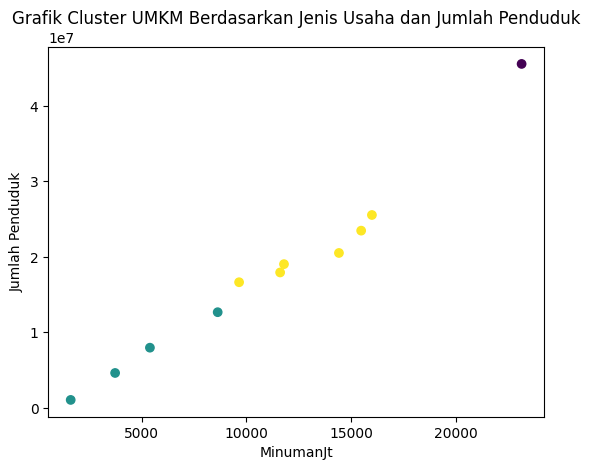

In [60]:
x = input("Masukkan jenis usaha anda : ")
plot_cluster(x)